In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10e401e80>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10e3e8908>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

Epoch 1: 6.0s to complete
    error(train)=1.30e+00, acc(train)=6.42e-01, error(valid)=1.33e+00, acc(valid)=6.29e-01


Epoch 2: 5.5s to complete
    error(train)=1.14e+00, acc(train)=6.82e-01, error(valid)=1.17e+00, acc(valid)=6.71e-01


Epoch 3: 4.2s to complete
    error(train)=1.06e+00, acc(train)=7.05e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


Epoch 4: 4.6s to complete
    error(train)=9.96e-01, acc(train)=7.21e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 5: 4.8s to complete
    error(train)=9.42e-01, acc(train)=7.33e-01, error(valid)=9.82e-01, acc(valid)=7.17e-01


Epoch 6: 3.6s to complete
    error(train)=9.02e-01, acc(train)=7.44e-01, error(valid)=9.45e-01, acc(valid)=7.26e-01


Epoch 7: 3.8s to complete
    error(train)=8.67e-01, acc(train)=7.51e-01, error(valid)=9.14e-01, acc(valid)=7.33e-01


Epoch 8: 5.6s to complete
    error(train)=8.34e-01, acc(train)=7.60e-01, error(valid)=8.83e-01, acc(valid)=7.43e-01


Epoch 9: 6.6s to complete
    error(train)=8.08e-01, acc(train)=7.66e-01, error(valid)=8.57e-01, acc(valid)=7.48e-01


Epoch 10: 4.7s to complete
    error(train)=7.86e-01, acc(train)=7.71e-01, error(valid)=8.40e-01, acc(valid)=7.52e-01


Epoch 11: 5.8s to complete
    error(train)=7.66e-01, acc(train)=7.77e-01, error(valid)=8.21e-01, acc(valid)=7.59e-01


Epoch 12: 3.5s to complete
    error(train)=7.51e-01, acc(train)=7.79e-01, error(valid)=8.06e-01, acc(valid)=7.59e-01


Epoch 13: 3.8s to complete
    error(train)=7.30e-01, acc(train)=7.86e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


Epoch 14: 5.1s to complete
    error(train)=7.14e-01, acc(train)=7.89e-01, error(valid)=7.70e-01, acc(valid)=7.71e-01


Epoch 15: 3.9s to complete
    error(train)=7.01e-01, acc(train)=7.93e-01, error(valid)=7.60e-01, acc(valid)=7.72e-01


Epoch 16: 4.4s to complete
    error(train)=6.87e-01, acc(train)=7.96e-01, error(valid)=7.47e-01, acc(valid)=7.77e-01


Epoch 17: 3.5s to complete
    error(train)=6.76e-01, acc(train)=7.99e-01, error(valid)=7.37e-01, acc(valid)=7.79e-01


Epoch 18: 4.0s to complete
    error(train)=6.63e-01, acc(train)=8.02e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


Epoch 19: 4.8s to complete
    error(train)=6.57e-01, acc(train)=8.03e-01, error(valid)=7.18e-01, acc(valid)=7.84e-01


Epoch 20: 4.1s to complete
    error(train)=6.44e-01, acc(train)=8.07e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


Epoch 21: 3.6s to complete
    error(train)=6.35e-01, acc(train)=8.09e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


Epoch 22: 3.5s to complete
    error(train)=6.28e-01, acc(train)=8.11e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 23: 4.2s to complete
    error(train)=6.19e-01, acc(train)=8.13e-01, error(valid)=6.86e-01, acc(valid)=7.90e-01


Epoch 24: 3.5s to complete
    error(train)=6.13e-01, acc(train)=8.13e-01, error(valid)=6.79e-01, acc(valid)=7.88e-01


Epoch 25: 3.5s to complete
    error(train)=6.02e-01, acc(train)=8.18e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 26: 5.5s to complete
    error(train)=6.00e-01, acc(train)=8.18e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 27: 5.2s to complete
    error(train)=5.91e-01, acc(train)=8.21e-01, error(valid)=6.60e-01, acc(valid)=7.99e-01


Epoch 28: 4.5s to complete
    error(train)=5.87e-01, acc(train)=8.21e-01, error(valid)=6.55e-01, acc(valid)=7.97e-01


Epoch 29: 4.6s to complete
    error(train)=5.78e-01, acc(train)=8.25e-01, error(valid)=6.46e-01, acc(valid)=8.01e-01


Epoch 30: 5.6s to complete
    error(train)=5.76e-01, acc(train)=8.24e-01, error(valid)=6.46e-01, acc(valid)=7.98e-01


Epoch 31: 4.0s to complete
    error(train)=5.69e-01, acc(train)=8.26e-01, error(valid)=6.40e-01, acc(valid)=8.05e-01


Epoch 32: 6.0s to complete
    error(train)=5.65e-01, acc(train)=8.28e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


Epoch 33: 4.1s to complete
    error(train)=5.60e-01, acc(train)=8.29e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 34: 4.1s to complete
    error(train)=5.57e-01, acc(train)=8.30e-01, error(valid)=6.31e-01, acc(valid)=8.06e-01


Epoch 35: 4.4s to complete
    error(train)=5.52e-01, acc(train)=8.30e-01, error(valid)=6.26e-01, acc(valid)=8.05e-01


Epoch 36: 3.6s to complete
    error(train)=5.49e-01, acc(train)=8.31e-01, error(valid)=6.25e-01, acc(valid)=8.07e-01


Epoch 37: 3.6s to complete
    error(train)=5.45e-01, acc(train)=8.32e-01, error(valid)=6.23e-01, acc(valid)=8.09e-01


Epoch 38: 5.3s to complete
    error(train)=5.40e-01, acc(train)=8.34e-01, error(valid)=6.16e-01, acc(valid)=8.09e-01


Epoch 39: 4.6s to complete
    error(train)=5.39e-01, acc(train)=8.33e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


Epoch 40: 3.7s to complete
    error(train)=5.35e-01, acc(train)=8.34e-01, error(valid)=6.12e-01, acc(valid)=8.09e-01



--------------------------------------------------------------------------------
coefficient=0.00
--------------------------------------------------------------------------------


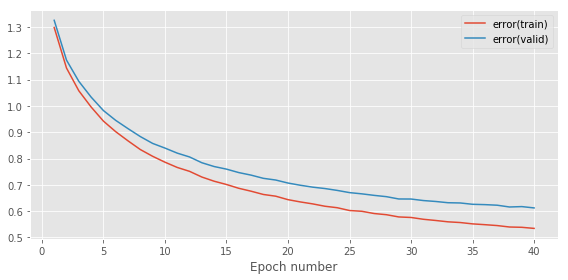

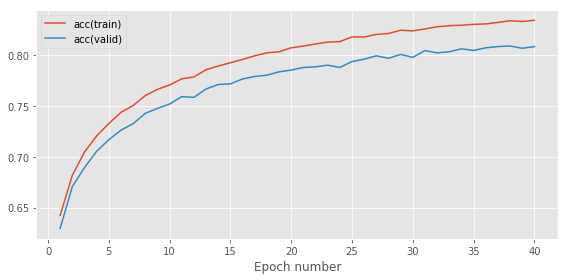

    final error(train) = 5.35e-01
    final error(valid) = 6.12e-01
    final acc(train)   = 8.34e-01
    final acc(valid)   = 8.09e-01
    run time per epoch = 5.90


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
coefficient = 1e-3
num_epochs = 40
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
learning_rate = 1e-4

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
weights_penalty = L2Penalty(coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty=weights_penalty), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=weights_penalty), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=weights_penalty)
])

scheduler = ConstantLearningRateScheduler(learning_rate)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.tight_layout()
fig_1_name = "adam_l2_fig_1_test_" + str(learning_rate) + ".pdf"
fig_1.savefig(fig_1_name)

fig_2.tight_layout()
fig_2_name = "adam_l2_fig_2_test_" + str(learning_rate) + ".pdf"
fig_2.savefig(fig_2_name)

print('-' * 80)
print('coefficient={0:.2f}'
      .format(coefficient))
print('-' * 80)

plt.show()

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    